
 Statistici descriptive:
            User  Time_Standard  Errors_Standard  Satisfaction_Standard  \
count  20.00000      20.000000        20.000000              20.000000   
mean   10.50000     145.750000         4.100000              72.800000   
std     5.91608       7.676862         0.852242               3.412053   
min     1.00000     133.000000         3.000000              68.000000   
25%     5.75000     138.750000         3.000000              69.750000   
50%    10.50000     146.500000         4.000000              73.000000   
75%    15.25000     150.500000         5.000000              75.250000   
max    20.00000     160.000000         5.000000              78.000000   

        Time_AMID  Errors_AMID  Satisfaction_AMID  Δ_time(%)  Δ_errors(%)  \
count   20.000000    20.000000          20.000000  20.000000    20.000000   
mean   125.750000     3.100000          82.800000 -13.758476   -25.500000   
std      7.676862     0.852242           3.412053   0.727406     5.673886  

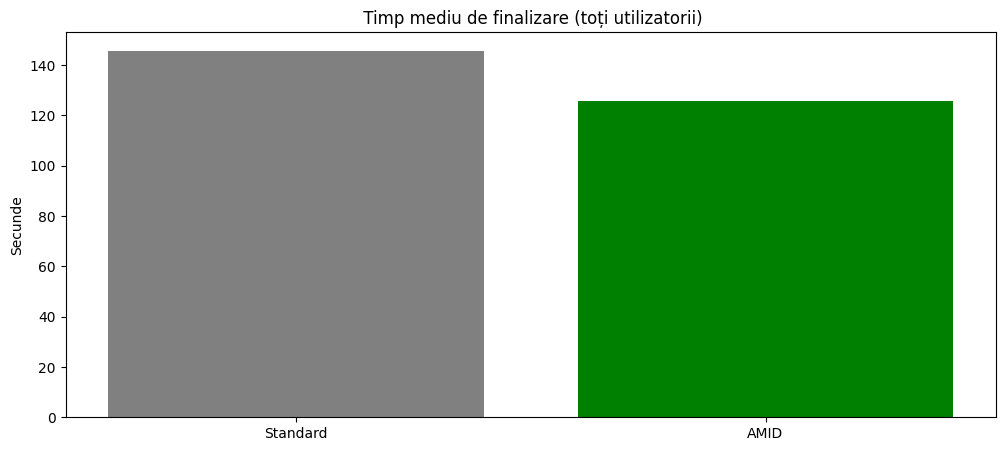

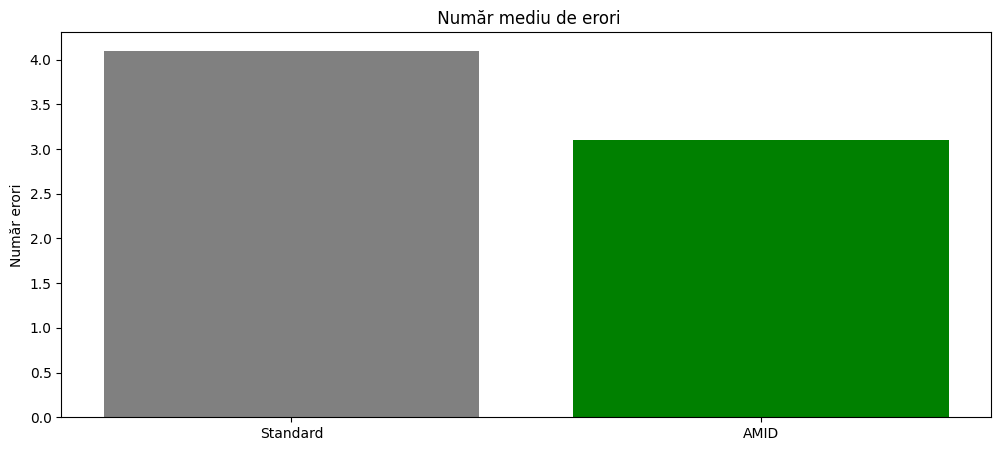

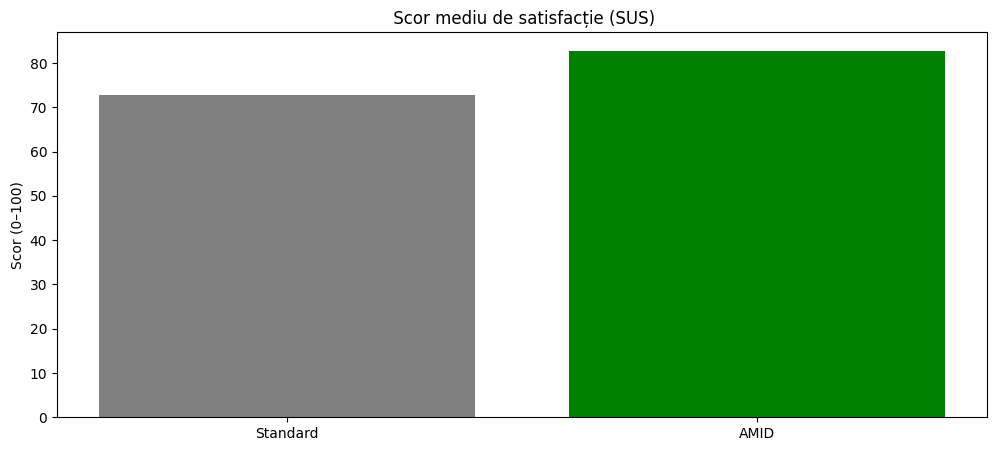


 Raport sumar:
 Îmbunătățire medie timp: -13.76%
 Reducere medie erori: -25.50%
 Creștere medie satisfacție: 13.76%
 Rezultatele au fost salvate în results.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Citire fișier și curățare 
df = pd.read_csv("input_data_experiment.csv", sep=";", encoding="utf-8")
df.columns = df.columns.str.strip().str.replace('\ufeff', '')

# Simulare îmbunătățiri AMID 
df["Time_AMID"] = df["Time_Standard"] - 20
df["Errors_AMID"] = df["Errors_Standard"] - 1
df["Satisfaction_AMID"] = df["Satisfaction_Standard"] + 10

# Calcul îmbunătățiri procentuale 
df["Δ_time(%)"] = ((df["Time_AMID"] - df["Time_Standard"]) / df["Time_Standard"]) * 100
df["Δ_errors(%)"] = ((df["Errors_AMID"] - df["Errors_Standard"]) / df["Errors_Standard"]) * 100
df["Δ_satisfaction(%)"] = ((df["Satisfaction_AMID"] - df["Satisfaction_Standard"]) / df["Satisfaction_Standard"]) * 100

# Statistici descriptive 
summary = df.describe()
print("\n Statistici descriptive:\n", summary)

# Analiză pe context și device 
group_context = df.groupby("Context")[["Time_Standard", "Time_AMID", "Errors_Standard", "Errors_AMID"]].mean()
group_device = df.groupby("Device")[["Time_Standard", "Time_AMID"]].mean()

print("\n Medii pe context:\n", group_context)
print("\n Medii pe tip de dispozitiv:\n", group_device)

# Corelații între variabile 
print("\n Corelații între variabile numerice:\n", df.corr(numeric_only=True))

# Vizualizări comparative multiple 
plt.figure(figsize=(12, 5))
plt.bar(["Standard", "AMID"], [df["Time_Standard"].mean(), df["Time_AMID"].mean()], color=["gray", "green"])
plt.title(" Timp mediu de finalizare (toți utilizatorii)")
plt.ylabel("Secunde")
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(["Standard", "AMID"], [df["Errors_Standard"].mean(), df["Errors_AMID"].mean()], color=["gray", "green"])
plt.title(" Număr mediu de erori")
plt.ylabel("Număr erori")
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(["Standard", "AMID"], [df["Satisfaction_Standard"].mean(), df["Satisfaction_AMID"].mean()], color=["gray", "green"])
plt.title(" Scor mediu de satisfacție (SUS)")
plt.ylabel("Scor (0–100)")
plt.show()

# Raport sumar în consolă 
print("\n Raport sumar:")
print(f" Îmbunătățire medie timp: {df['Δ_time(%)'].mean():.2f}%")
print(f" Reducere medie erori: {df['Δ_errors(%)'].mean():.2f}%")
print(f" Creștere medie satisfacție: {df['Δ_satisfaction(%)'].mean():.2f}%")

# Salvare rezultate 
df.to_csv("results.csv", index=False)
print(" Rezultatele au fost salvate în results.csv")
